# 모듈 준비

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
import dlib
import cv2
%matplotlib inline

# 디렉토리 변수 지정 및 디렉토리 내 이미지 파일 출력

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/BJ' # 아프리카 BJ 이미지 파일 저장 위치
file_list = os.listdir(dir_path)   # 이미지 파일 저장 위치 내 파일 List
file_list = [file for file in file_list if file.endswith(".jpg")] # '.ipynb_checkpoints' 디렉토리 제외
print ("file_list: {}".format(file_list))

file_list: ['와꾸대장봉준.jpg', '킹기훈.jpg', '용느.jpg', '전태규.jpg', 'bj권민규.jpg', '프레이.jpg', '홍구.jpg', '보겸.jpg', '커맨더지코.jpg', '필메.jpg', '꿀탱탱.jpg', '엠브로.jpg', '오메킴.jpg', '기뉴다.jpg', '민규.jpg', '감스트.jpg', '로렌.jpg', '저라뎃.jpg', '세자.jpg', '시조새.jpg']


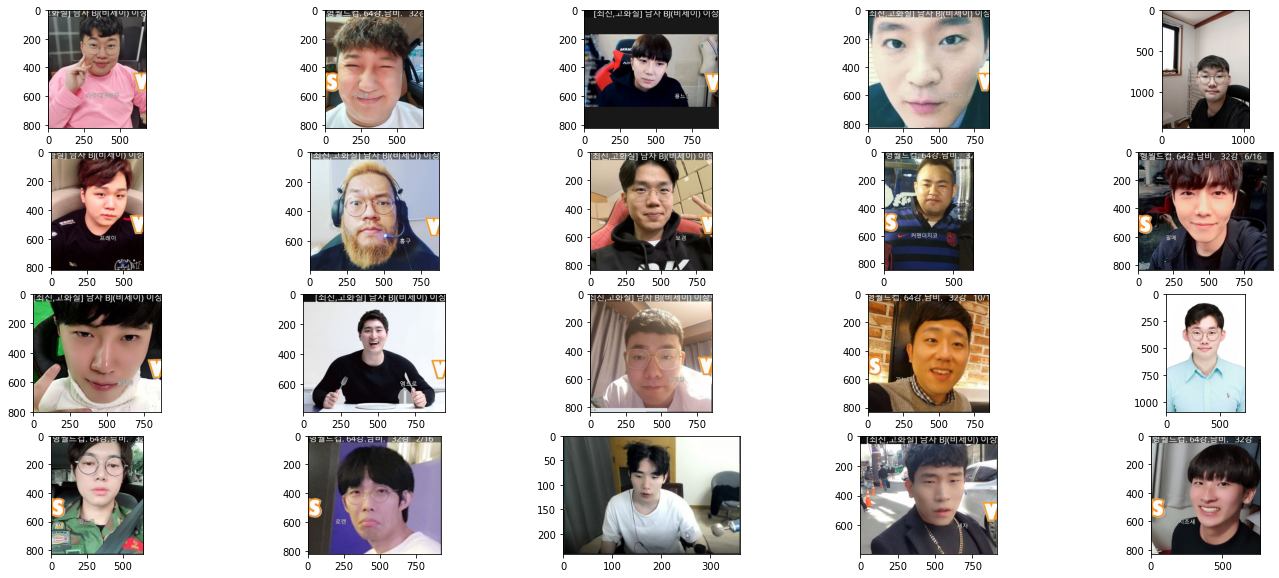

In [3]:
#Set figsize here
'''
Subplot 설정 방법

1) subplot(nrows, ncols, index, **kwargs)
2) subpolt(pos, **kwargs)    
   # pos는 nrows, ncols, index를 이어서 3자리 정수로 입력받는다.
3) subpolt(axes)
'''
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24,10))  # 총 20개 이미지 출력을 위해 4행x5열

# flatten axes for easy iterating
# ndarray.flatten() : ndarray 메소드로 1차원 반환, 각 요소에 접근 시 이중 반복문을 사용할 필요가 없어짐
for i, ax in enumerate(axes.flatten()):  
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout() # fig의 모서리와 서브플롯의 모서리 사이의 여백을 설정 

In [4]:
# subplot 객체의 메소드 
dir(axes[0][0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_box_aspect',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',

# 이미지 출력 및 얼굴 인식 예시 1 ( 와꾸대장봉준 )

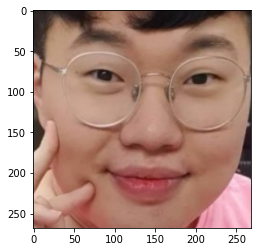

In [5]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/BJ/와꾸대장봉준.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image) 

#print(face_locations)  # 얼굴 영역 좌표 출력 
# face_locations() 메소드: 얼굴 영역의 좌표를 가지는 튜플을 요소로 하는 리스트 반환 
a, b, c, d = face_locations[0]  
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

# 이미지 파일에서 얼굴 부분 Crop

In [6]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    # a : 좌측상단 Y좌표
    # b : 우측하단 Y좌표
    # c : 좌측상단 X좌표
    # d : 우측하단 X좌표
    a, b, c, d = face_locations[0]
    # image[좌측상단 Y좌표 : 우측하단 Y좌표, 좌측상단 X좌표 : 우측하단 X좌표]
    cropped_face = image[a:c,d:b,:]
    return cropped_face # 얼굴 영역 반환

# 이미지 출력 및 얼굴 인식 예시 2 ( 저라뎃 )

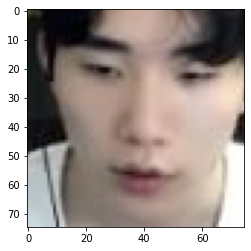

In [7]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/BJ/저라뎃.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

# 이미지 출력 및 얼굴 인식 예시 3 ( 기뉴다 )

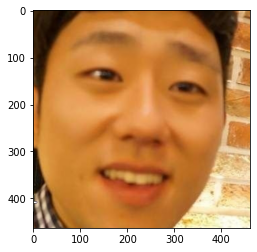

In [8]:
image_file = os.path.join(dir_path, '기뉴다.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
plt.imshow(face)

# Face Embedding

In [9]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print(len(embedding[0]))
embedding

128


[array([-0.02727047,  0.03546883,  0.00058521, -0.03432832, -0.07814783,
         0.0207427 , -0.04275993, -0.11956041,  0.09948467, -0.11260318,
         0.14127946, -0.03495169, -0.20755951, -0.06999808, -0.07620315,
         0.15493824, -0.12169339, -0.12000677, -0.02941638,  0.03857738,
         0.11504868,  0.01226366, -0.00178255,  0.01068849, -0.04580599,
        -0.26748893, -0.12031996, -0.0702941 , -0.00602415, -0.06757646,
        -0.05095606,  0.02067017, -0.14597049, -0.01836633,  0.01813718,
         0.00199638, -0.03277585, -0.04884464,  0.21147154,  0.04451798,
        -0.21598431,  0.08411827,  0.01023687,  0.22048967,  0.16083261,
         0.01682648,  0.01812502, -0.17660947,  0.12993214, -0.1573938 ,
         0.0155866 ,  0.18746661,  0.0881355 ,  0.08092422, -0.05797368,
        -0.09114754,  0.05129713,  0.05145854, -0.11071573,  0.06588891,
         0.10965744, -0.04403664, -0.06741979, -0.07575429,  0.17566796,
         0.02568052, -0.12649402, -0.21887551,  0.0

#  디렉토리 내 이미지 파일 Face Embedding

In [10]:
def get_face_embedding_dict(dir_path):
    dir_path = os.getenv('HOME')+'/aiffel/face_embedding/BJ' # 아프리카 BJ 이미지 파일 저장 위치
    file_list = os.listdir(dir_path)   # 이미지 파일 저장 위치 내 파일 List
    file_list = [file for file in file_list if file.endswith(".jpg")] # '.ipynb_checkpoints' 디렉토리 제외
    embedding_dict = {}
    
    for file in file_list:
        image_file = os.path.join(dir_path, file)
        face = get_cropped_face(image_file)
        name = file.split('.')[0] # 파일명만 취함, 확장자명 제외
        embedding_dict[name] = get_face_embedding(face)[0] 
        
        # Cropped 이미지 저장 
        face_resize = cv2.resize(face,(400,400))
        #pillow_image = Image.fromarray(face)
        #path_to_save = image_file.replace('BJ','BJ_Cropped')
        #pillow_image.save(path_to_save)
    return embedding_dict

In [11]:
embedding_dict = get_face_embedding_dict(dir_path)

# L2 Distance를 활용한 유사도 측정

In [12]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('저라뎃', '꿀탱탱')

0.5039859896839559

# 가장 유사한 BJ들 5명 출력

In [13]:
def get_nearest_face(name, top=5): 
    distance_dict = {} # 입력받은 BJ( name )를 기준으로, 거리를 Key 값, BJ명을 Value값으로 하는 Dict
    for file in file_list:
        name_file = file.split('.')[0]
        if name_file == name: # 자기 자신의 유사도는 제외
            continue
        else:
            distance_dict[name_file] = get_distance(name,name_file)  
    if len(set(distance_dict.values())) == len(distance_dict.values()): # Dict 키 값이 중복되는 경우
        reverse_dict={}
        for name, data in distance_dict.items():
            reverse_dict[data] = name
        rank = sorted(reverse_dict.keys(),reverse = False) # 오름차순 정렬 
        for i in rank:
            if rank.index(i) > 5:
                continue
            else:
                print(f"순위 {rank.index(i)+1} : 이름({reverse_dict[i]}), 거리({i})")
    else:
         print("거리가 동일한 값이 있습니다")           
get_nearest_face('민규')

순위 1 : 이름(bj권민규), 거리(0.322112666244115)
순위 2 : 이름(와꾸대장봉준), 거리(0.3720201797787499)
순위 3 : 이름(보겸), 거리(0.44176407311302784)
순위 4 : 이름(기뉴다), 거리(0.46963681243679956)
순위 5 : 이름(프레이), 거리(0.478309610683003)
순위 6 : 이름(로렌), 거리(0.4995703334817844)


# 특정 BJ를 기준으로 유사도를 측정하는 함수를 반환하는 함수

In [14]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('bj권민규') # bj민규를 기준으로 유사도를 측정하는 함수  
sort_key_func('저라뎃') # bj민규와 저라뎃 사이의 유사도 측정

0.6596999238037178

# 최종 코드

In [20]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    # temp : List 
    temp = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    storage = []
    for i in range(top+1):
        if i == 0:
            continue
        else: 
            print('순위 {} : 이름({}), 거리({})'.format(i, temp[i][0], sort_key_func(temp[i][0])))
            storage.append(temp[i][0])
    return storage

순위 1 : 이름(민규), 거리(0.322112666244115)
순위 2 : 이름(와꾸대장봉준), 거리(0.4036990492163637)
순위 3 : 이름(보겸), 거리(0.4681291092966753)
순위 4 : 이름(커맨더지코), 거리(0.49393026967345)
순위 5 : 이름(프레이), 거리(0.5046973464953831)


# BJ권민규.jpg 기준 TOP 5

In [26]:
Top_5 = get_nearest_face('bj권민규')   

순위 1 : 이름(민규), 거리(0.322112666244115)
순위 2 : 이름(와꾸대장봉준), 거리(0.4036990492163637)
순위 3 : 이름(보겸), 거리(0.4681291092966753)
순위 4 : 이름(커맨더지코), 거리(0.49393026967345)
순위 5 : 이름(프레이), 거리(0.5046973464953831)


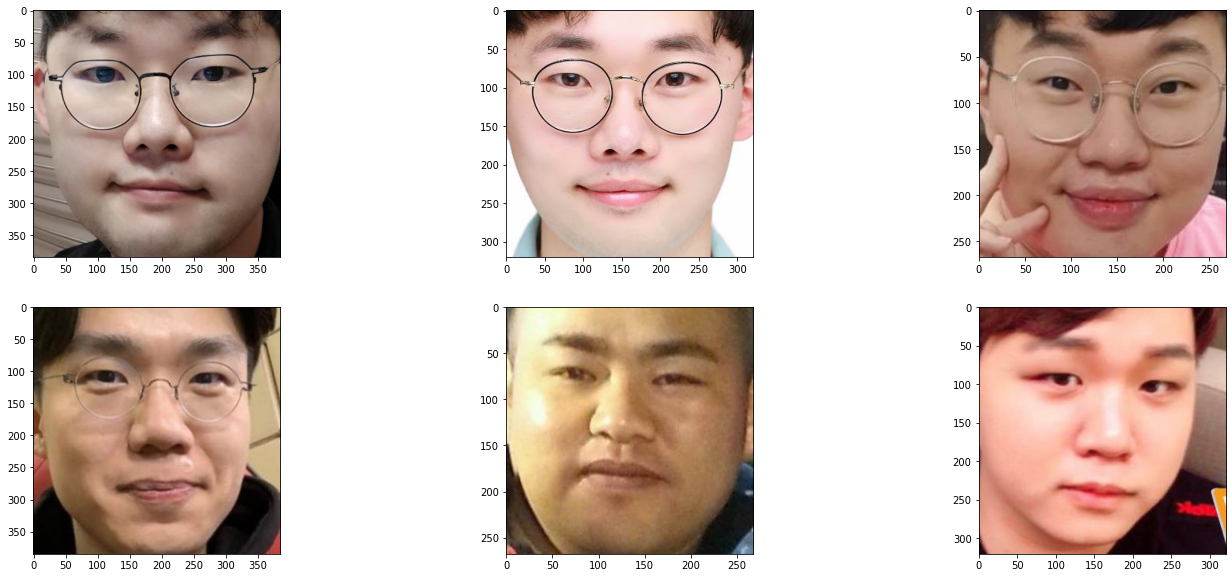

In [27]:
dir_cropped = os.getenv('HOME')+'/aiffel/face_embedding/BJ_Cropped' 
results = ['bj권민규'] + Top_5

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))  # 총 20개 이미지 출력을 위해 4행x5열

# flatten axes for easy iterating
# ndarray.flatten() : ndarray 메소드로 1차원 반환, 각 요소에 접근 시 이중 반복문을 사용할 필요가 없어짐
for i, ax in enumerate(axes.flatten()):  
    image = img.imread(dir_cropped +'/'+results[i]+'.jpg')
    ax.imshow(image)
plt.show()

fig.tight_layout() # fig의 모서리와 서브플롯의 모서리 사이의 여백을 설정 

# 민규.jpg 기준 TOP 5

In [28]:
Top_5 = get_nearest_face('민규')   

순위 1 : 이름(bj권민규), 거리(0.322112666244115)
순위 2 : 이름(와꾸대장봉준), 거리(0.3720201797787499)
순위 3 : 이름(보겸), 거리(0.44176407311302784)
순위 4 : 이름(기뉴다), 거리(0.46963681243679956)
순위 5 : 이름(프레이), 거리(0.478309610683003)


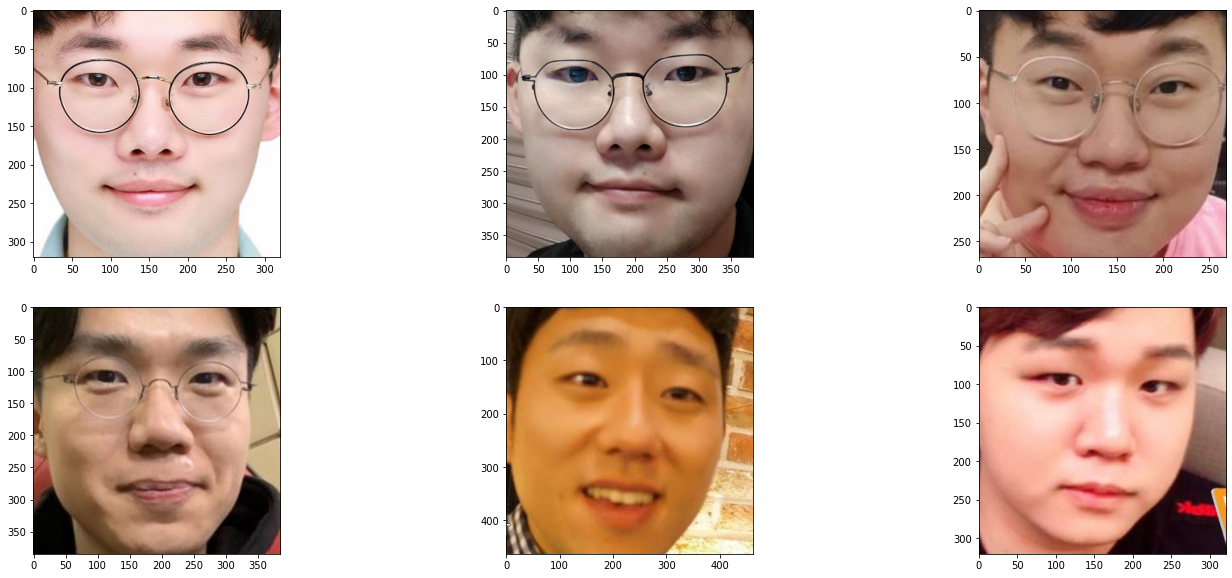

In [31]:
dir_cropped = os.getenv('HOME')+'/aiffel/face_embedding/BJ_Cropped' 
results = ['민규'] + Top_5

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(24,10))  # 총 20개 이미지 출력을 위해 4행x5열

# flatten axes for easy iterating
# ndarray.flatten() : ndarray 메소드로 1차원 반환, 각 요소에 접근 시 이중 반복문을 사용할 필요가 없어짐
for i, ax in enumerate(axes.flatten()):  
    image = img.imread(dir_cropped +'/'+results[i]+'.jpg')
    ax.imshow(image)
plt.show()

fig.tight_layout() # fig의 모서리와 서브플롯의 모서리 사이의 여백을 설정 

# Left -Right Mix

In [57]:
Original = os.path.join(dir_cropped, '민규.jpg')

In [58]:
Image_Origin = cv2.imread(Original)

In [59]:
Origianl_resized = cv2.resize(Image_Origin , (400, 400)) 

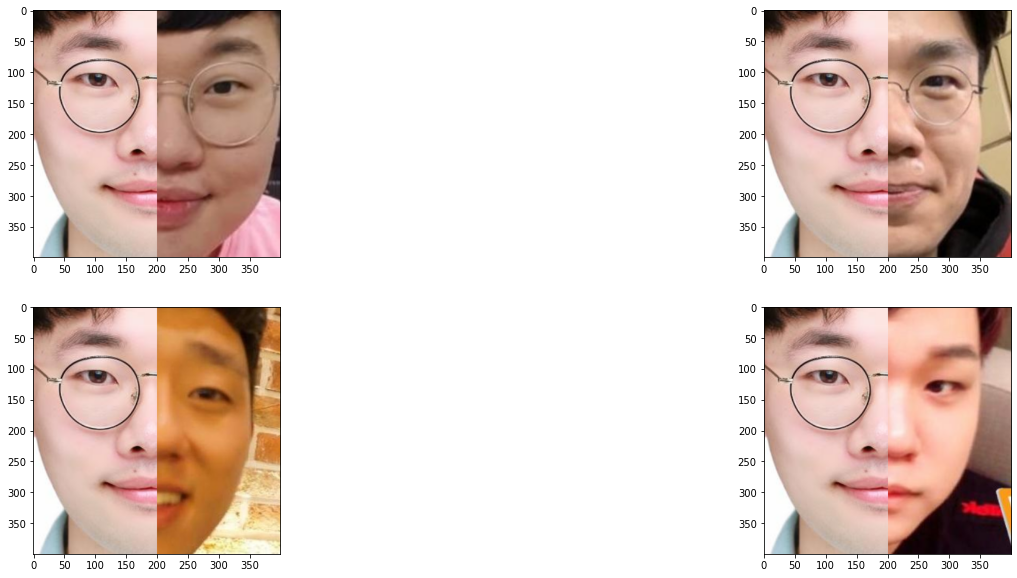

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(24,10))  # 총 4개 이미지 출력을 위해 2행x2열

# flatten axes for easy iterating
# ndarray.flatten() : ndarray 메소드로 1차원 반환, 각 요소에 접근 시 이중 반복문을 사용할 필요가 없어짐
for i, ax in enumerate(axes.flatten()):  
    Original_temp = Origianl_resized.copy() 
    Right_temp = cv2.imread(dir_cropped +'/'+Top_5[i+1]+'.jpg')
    Right_resized = cv2.resize(Right_temp  ,(400, 400)) 
    Original_temp[0:400,200:400] = Right_resized[0:400,200:400] 
    ax.imshow(cv2.cvtColor(Original_temp, cv2.COLOR_BGR2RGB))
plt.show()

fig.tight_layout() # fig의 모서리와 서브플롯의 모서리 사이의 여백을 설정 

# Top - Bottom Mix ( Ver.1 )

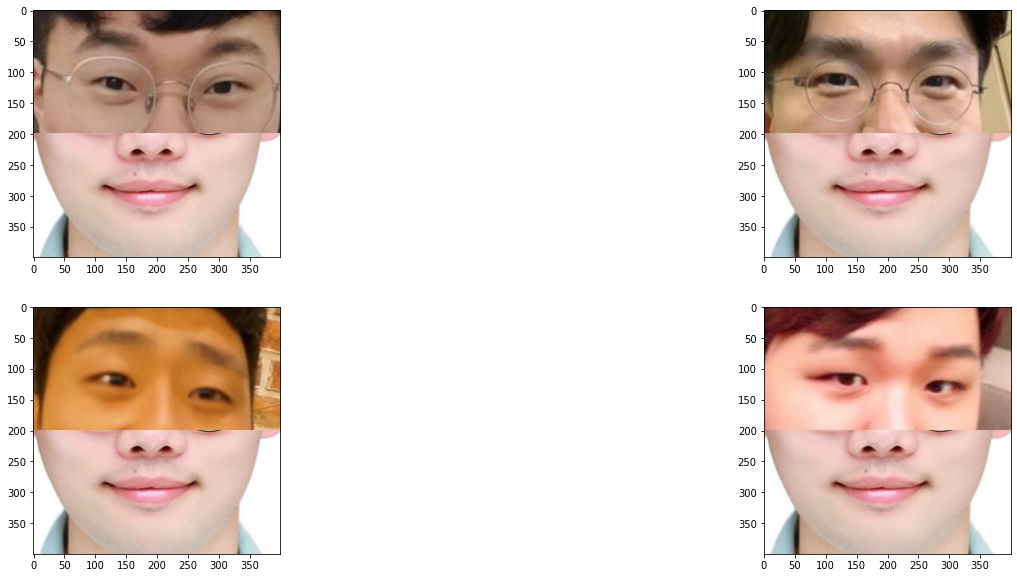

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(24,10))  # 총 4개 이미지 출력을 위해 2행x2열

# flatten axes for easy iterating
# ndarray.flatten() : ndarray 메소드로 1차원 반환, 각 요소에 접근 시 이중 반복문을 사용할 필요가 없어짐
for i, ax in enumerate(axes.flatten()):  
    Original_temp = Origianl_resized.copy() 
    Right_temp = cv2.imread(dir_cropped +'/'+Top_5[i+1]+'.jpg')
    Right_resized = cv2.resize(Right_temp  ,(400, 400)) 
    Original_temp[0:200,0:400] = Right_resized[0:200,0:400]
    ax.imshow(cv2.cvtColor(Original_temp, cv2.COLOR_BGR2RGB))
plt.show()

fig.tight_layout() # fig의 모서리와 서브플롯의 모서리 사이의 여백을 설정 

# Top - Bottom Mix ( Ver.2 )

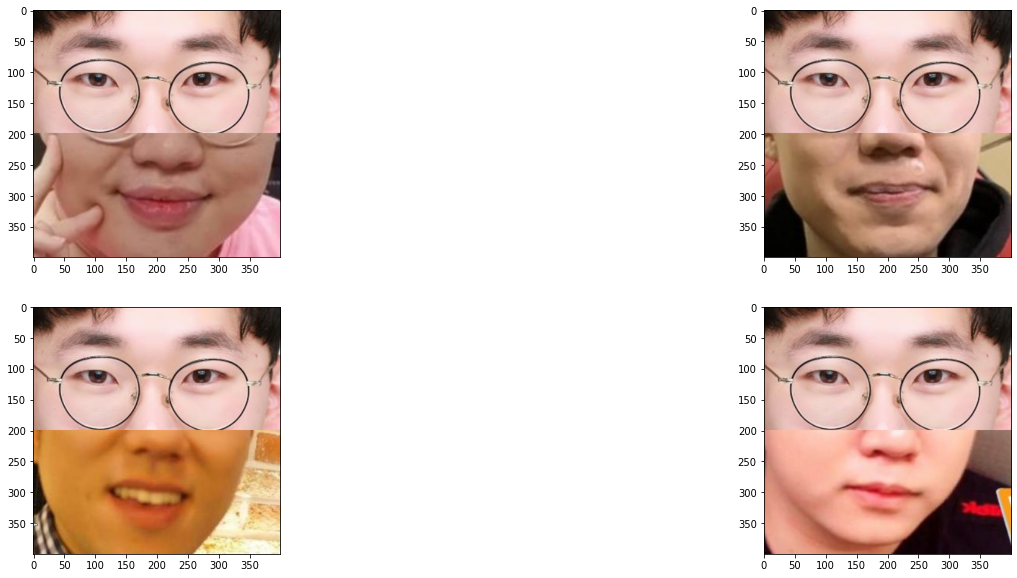

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(24,10))  # 총 4개 이미지 출력을 위해 2행x2열

# flatten axes for easy iterating
# ndarray.flatten() : ndarray 메소드로 1차원 반환, 각 요소에 접근 시 이중 반복문을 사용할 필요가 없어짐
for i, ax in enumerate(axes.flatten()):  
    Original_temp = Origianl_resized.copy() 
    Right_temp = cv2.imread(dir_cropped +'/'+Top_5[i+1]+'.jpg')
    Right_resized = cv2.resize(Right_temp  ,(400, 400)) 
    Original_temp[200:400,0:400] = Right_resized[200:400,0:400]
    ax.imshow(cv2.cvtColor(Original_temp, cv2.COLOR_BGR2RGB))
plt.show()

fig.tight_layout() # fig의 모서리와 서브플롯의 모서리 사이의 여백을 설정 